- Data Exploratory
- Data cleaning

In [1]:
import glob
from os import getcwd
import os
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot 
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
# get working directory
path = os.path.dirname(getcwd())
os.chdir(path)

In [4]:
df = pd.read_pickle('data/1-preprocessed.pkl')
print(f'Data shape: {df.shape}\n\
\nCheck NA: {df.isna().any()}\n\
\nMin and Max date index:{df.index.min().date(),df.index.max().date()}\n\
\nTotal number of days:{(df.index.max()-df.index.min()).days +1}')

Data shape: (2511, 1)

Check NA: sales    False
dtype: bool

Min and Max date index:(datetime.date(2016, 1, 4), datetime.date(2022, 11, 18))

Total number of days:2511


Data Exploratory

Text(0.5, 0, 'Time')

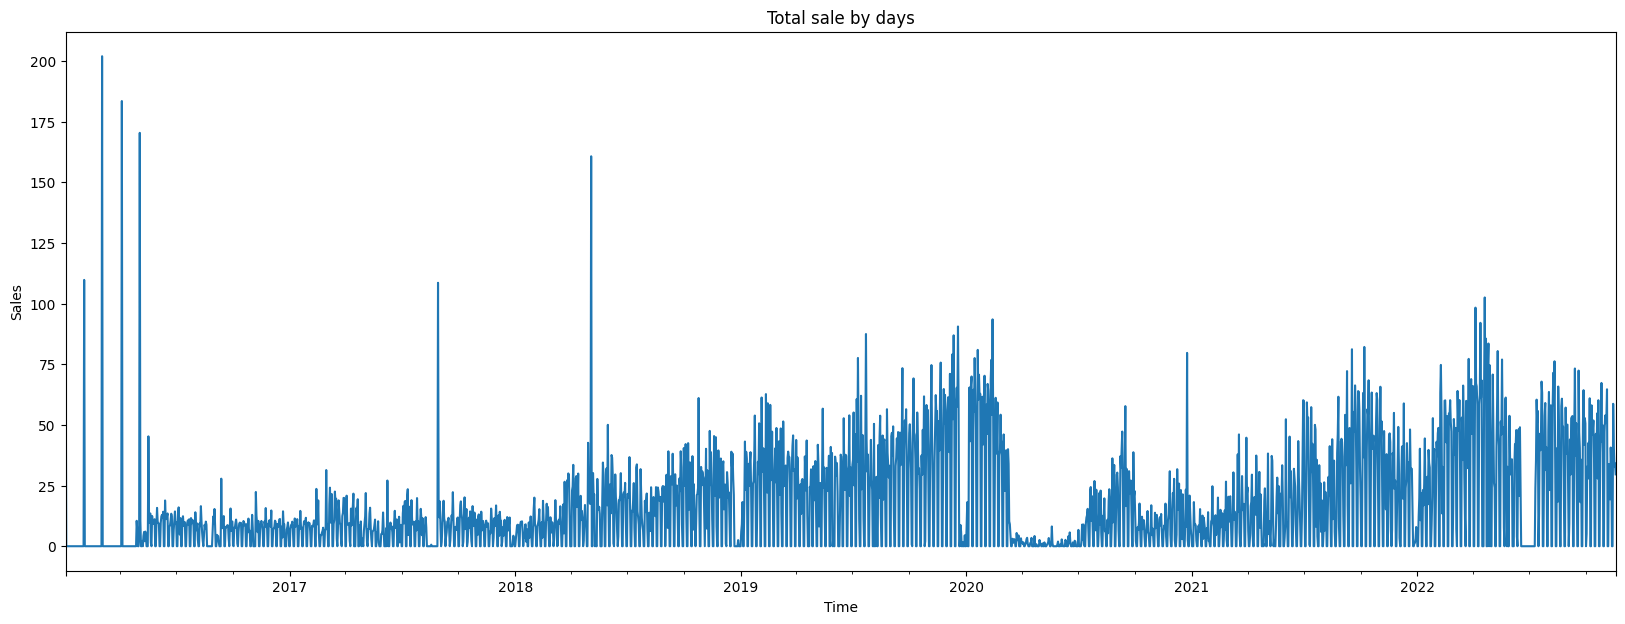

In [5]:
ax = df['sales'].plot(figsize=[20, 7])
ax.set_title('Total sale by days')
ax.set_ylabel("Sales")
ax.set_xlabel("Time")

New shape: (2388, 1)


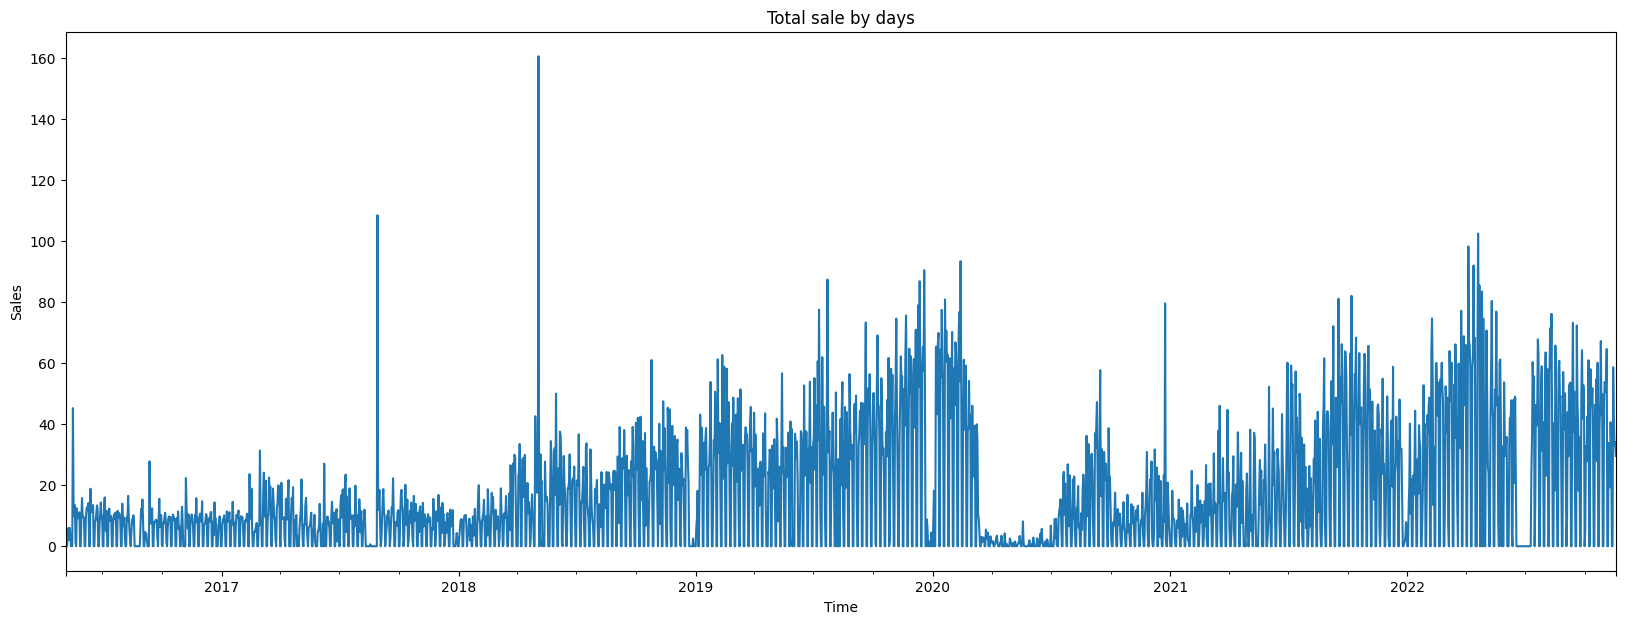

In [6]:
# delete unexplanable outliers/ unqualified data
df = df.loc[df.index >= '20160506']
print(f'New shape: {df.shape}')
ax = df['sales'].plot(figsize=[20, 7])
ax.set_title('Total sale by days')
ax.set_ylabel("Sales")
ax.set_xlabel("Time")
plt.show()

In [7]:
df.to_pickle('data/2-cleaned.pkl')

#### Checking data pattern by time: daily, weekly, monthly, yearly

In [8]:
df["week"] = df.index.isocalendar().week
df["day_of_week"] = df.index.day_of_week
df["day_of_month"] = df.index.month
df["month"] = df.index.month
df["year"] = df.index.year

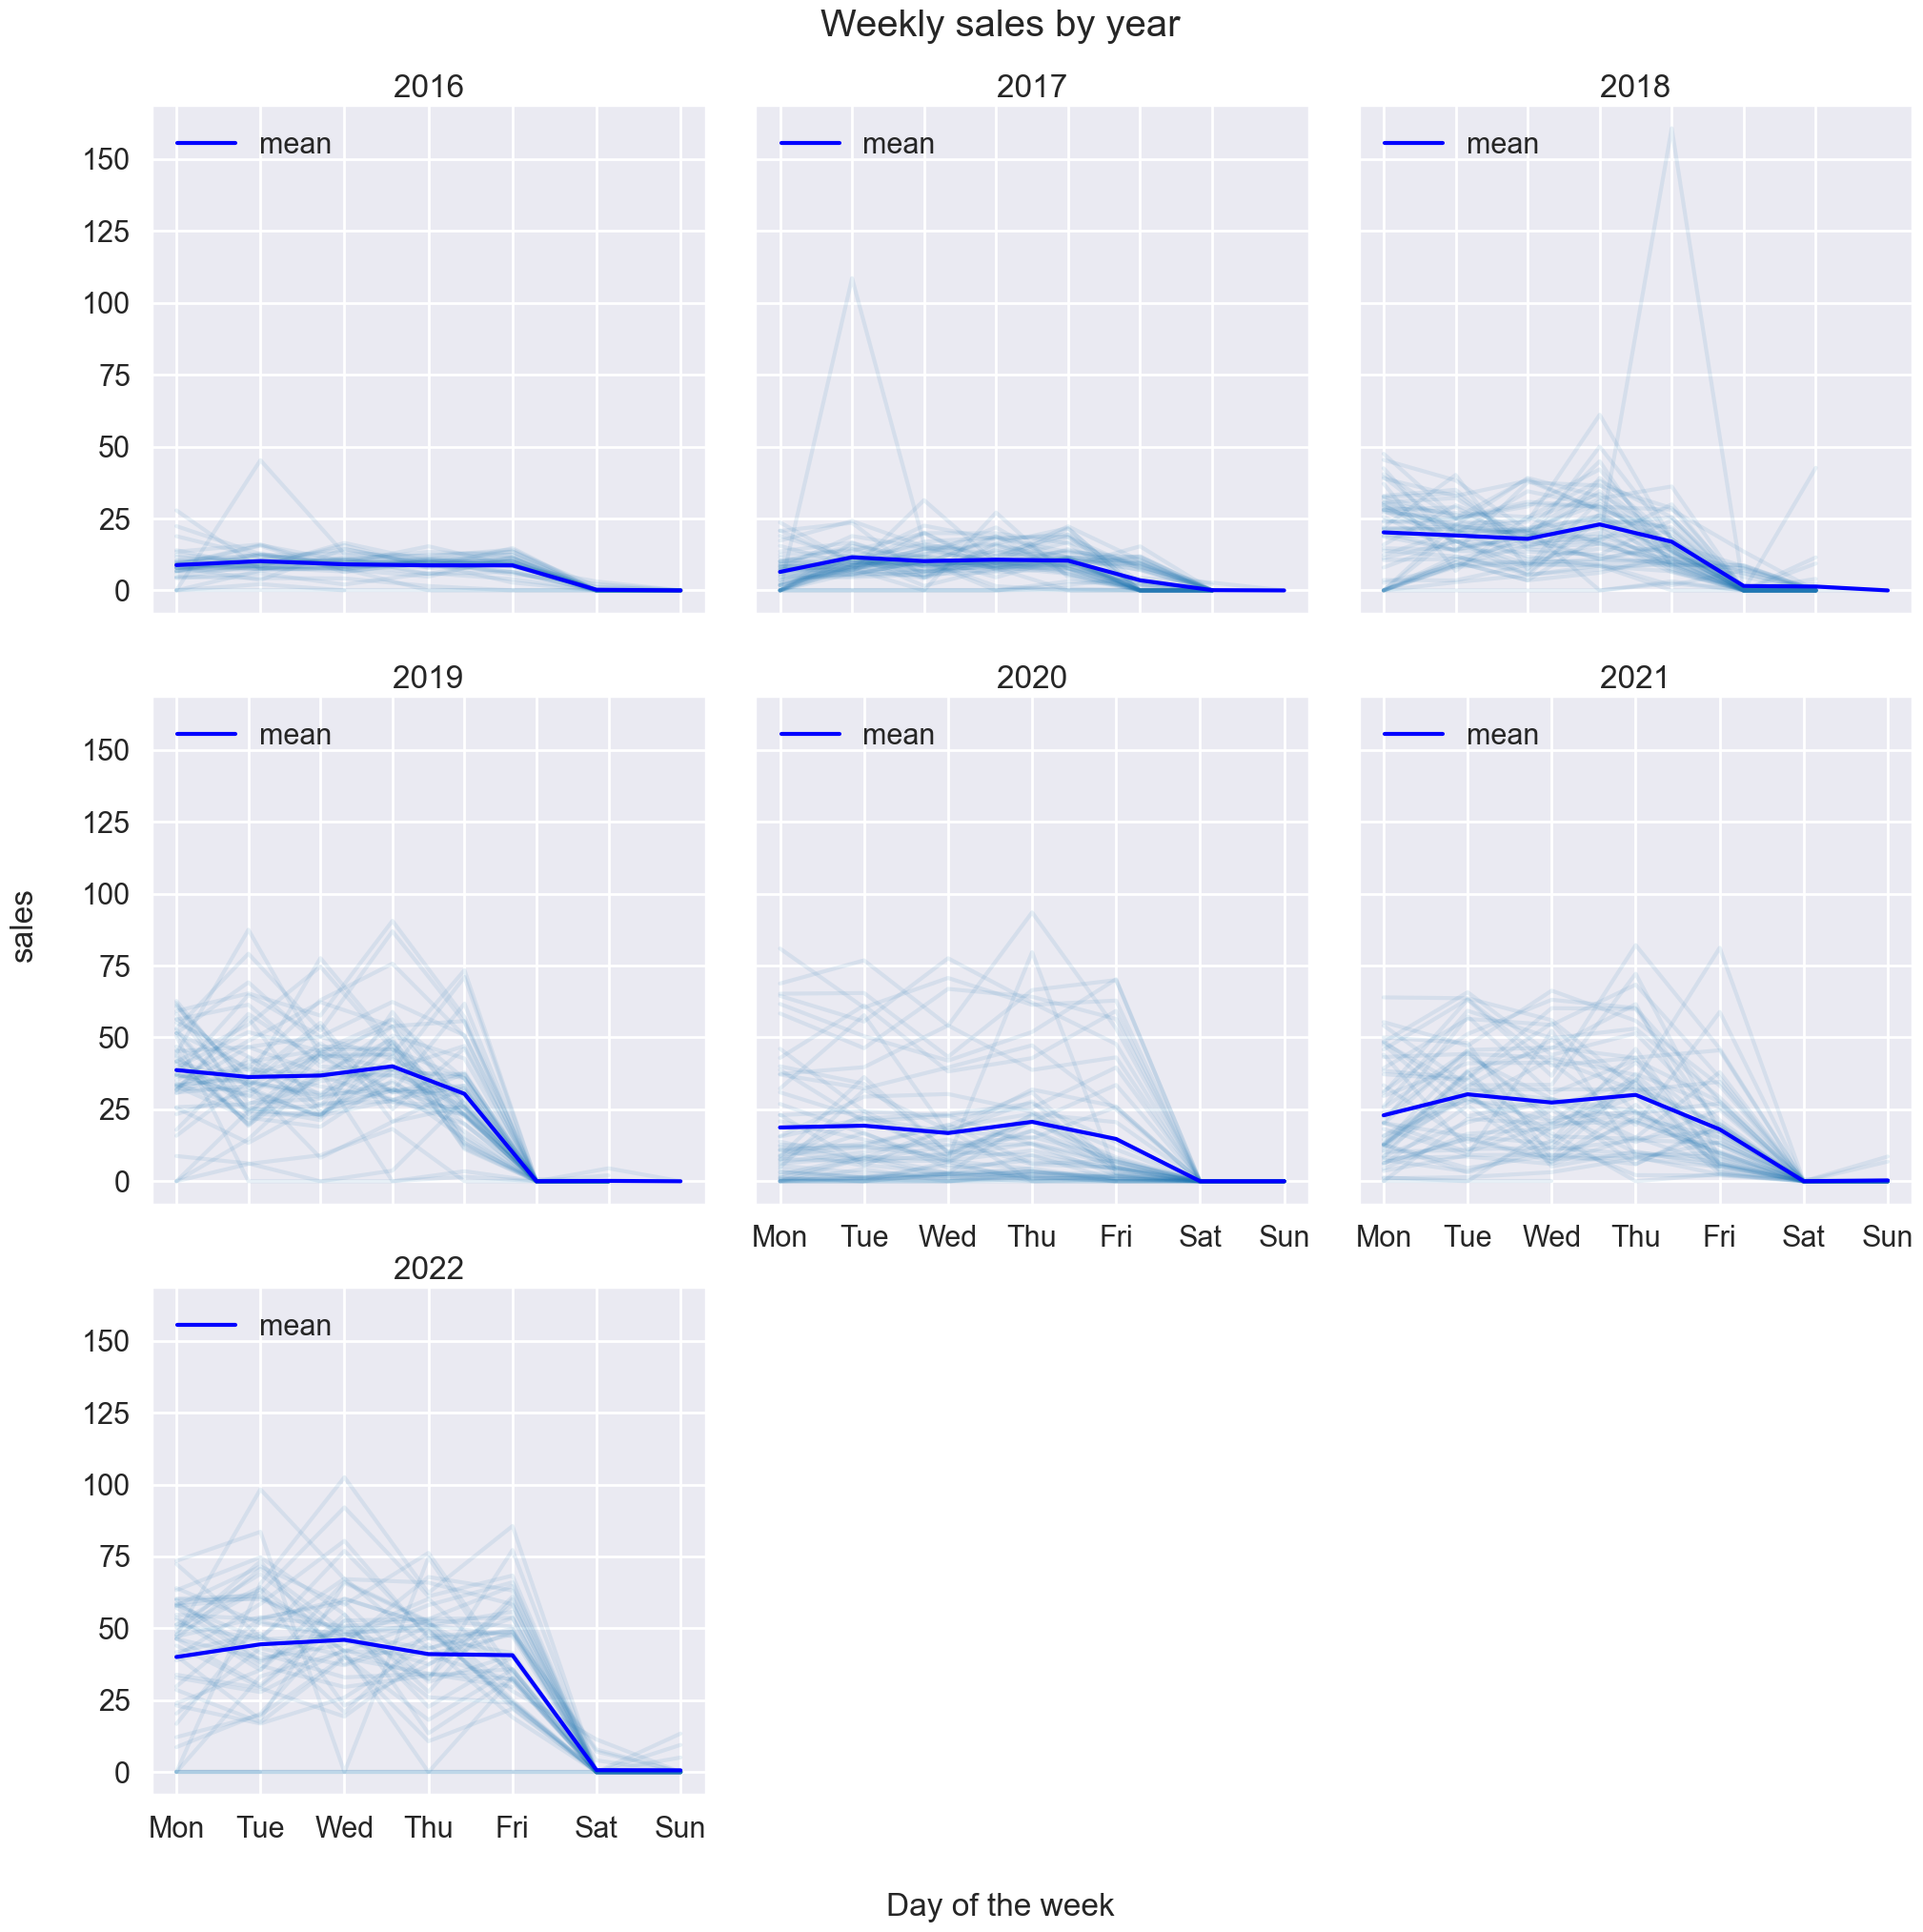

In [9]:
# CHECKING PATTERN weekly Sales through 7 years
import math
def plotweeklydatabyyear(data, var, years):
    fig, ax = plt.subplots(nrows=math.ceil(len(years)/3), ncols=3, figsize=[20, 20], sharey=True)
    ax = ax.flatten()
    sns_blue = sns.color_palette(as_cmap=True)[0] # Get seaborn blue color

    DAYS = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
    for ix, year in enumerate(years): # Iterate over each month
        weekly_ts = []
        for _, ts in ( 
            data[[var, "week", "year"]]
            .query(f"year== {year}") 
            .groupby("week") ):

            ts = ts.reset_index()
            weekly_ts.append(ts[var]) 
            ts[var].plot(
                alpha=0.1, ax=ax[ix], color=sns_blue, label="_no_legend_"
                )
            ax[ix].set_xticks(np.arange(0,7 ), labels=DAYS)
            ax[ix].set_title(year)


        pd.concat(weekly_ts, axis=1).mean(axis=1).plot(
            ax=ax[ix], color="blue", label="mean", legend=True
        ) 
        ax[ix].legend(loc="upper left", frameon=False)

        if year not in years[-3:]:
            ax[ix].tick_params(
                axis="x", which="both", bottom=False, top=False, labelbottom=False
            )
    fig.text(0.5, -0.02, "Day of the week", ha="center")
    fig.text(-0.02, 0.5, var, va="center", rotation="vertical")
    fig.suptitle("Weekly {} by year".format(var))
    if (3*math.ceil(len(years)/3))- len(years) ==1: 
        fig.delaxes(ax[-1])
    if (3*math.ceil(len(years)/3))- len(years) ==2: 
        fig.delaxes(ax[-1])
        fig.delaxes(ax[-2])
    fig.tight_layout()
    plt.show()
    
sns.set_style("darkgrid")
sns.set_context("poster")
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
plotweeklydatabyyear(df, 'sales', years)


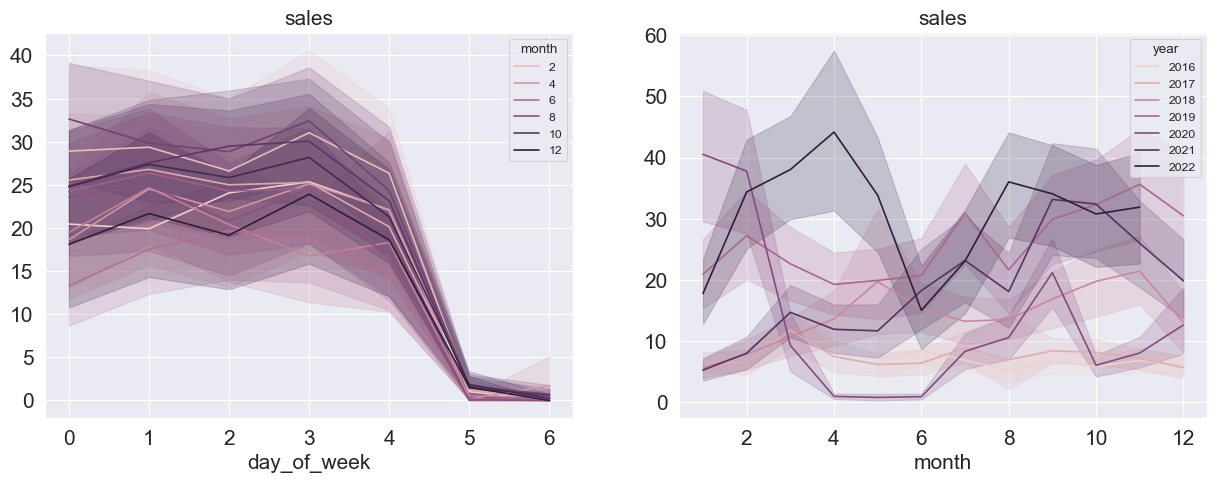

In [10]:
pd.plotting.register_matplotlib_converters()
variables = ['sales']
col_by_ylabel = {'Sales': 'euros'}
with sns.plotting_context("paper"):
    for var in variables:
        fig, ax = plt.subplots(ncols=2, figsize=[15, 5])
        ylabel = col_by_ylabel.get(var)

        sns.lineplot(data=df, y=var, x="day_of_week", hue="month", ax=ax[0])
        ax[0].set_ylabel(ylabel, fontsize = 15)
        ax[0].set_xlabel("day_of_week",fontsize = 15)
        ax[0].set_title(var,  size=15)
        ax[0].tick_params(axis='both', which='major', labelsize=15)

        sns.lineplot(data=df, y=var, x="day_of_month", hue="year", ax=ax[1])
        ax[1].set_ylabel(ylabel, fontsize = 15)
        ax[1].set_xlabel("month",fontsize = 15)
        ax[1].set_title(var,  size=15)
        ax[1].tick_params(axis='both', which='major', labelsize=15)
     
plt.show()

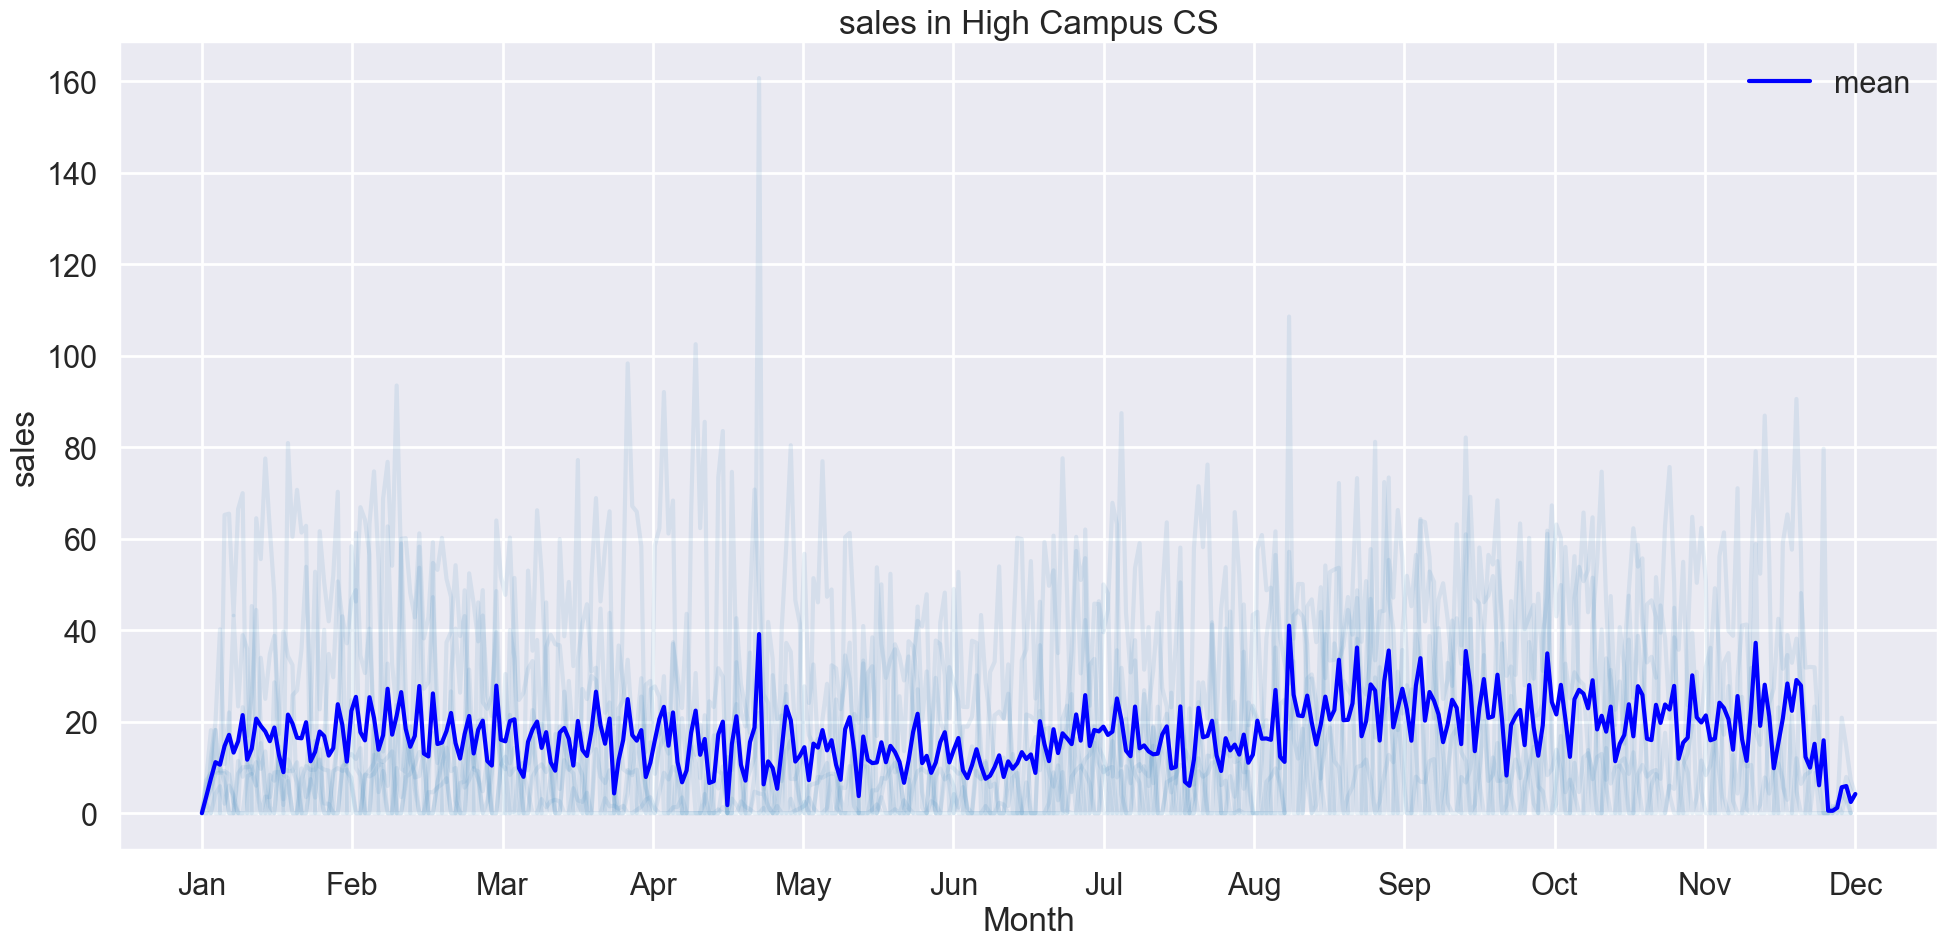

In [11]:
# Plot yearly by month 
def plotyearly(df, var):
    fig, ax = plt.subplots(figsize=[20, 10])
    yearly_ts = []
    sns_blue = sns.color_palette(as_cmap=True)
    Months = ["Jan", "Feb", "Mar", "Apr", "May", 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
    # Iterate over each month
    for year, ts in df.groupby("year"):
        ts = ts.reset_index()
        yearly_ts.append(ts[var]) # Store the monthly time series 
        ts[var].plot( # Plot the monthly time series
            alpha=0.1, ax=ax, label="_no_legend_", color=sns_blue)
        plt.xticks(ticks=np.linspace(0, 365, num=12), labels=Months)

    pd.concat(yearly_ts, axis=1).mean(axis=1).plot( # Compute average over all month and plot average
        ax=ax, color="blue", label="mean", legend=True)

    ax.set_ylabel(var)
    ax.set_title("{} in High Campus CS".format(var))
    ax.set_xlabel("Month")
    ax.legend(loc="upper right", frameon=False)

    plt.tight_layout()
    plt.show()

plotyearly(df, 'sales')
sns.reset_defaults()